In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib


Access is denied.


In [2]:
import pandas as pd

# dataset load
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Shape of dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data types + null values
print("\nInfo:")
print(df.info())

# Statistical summary (only numeric columns)
print("\nSummary:")
print(df.describe())

# Null values count
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   Onli

In [4]:
df.drop("customerID", axis=1, inplace=True)


In [6]:
# Convert to numeric, force errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values with median
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())



In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode columns with Yes/No
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
df = pd.get_dummies(df, drop_first=True)


In [9]:
# Features and Target
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [14]:
y_pred_lr = log_reg.predict(X_test_scaled)


In [16]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



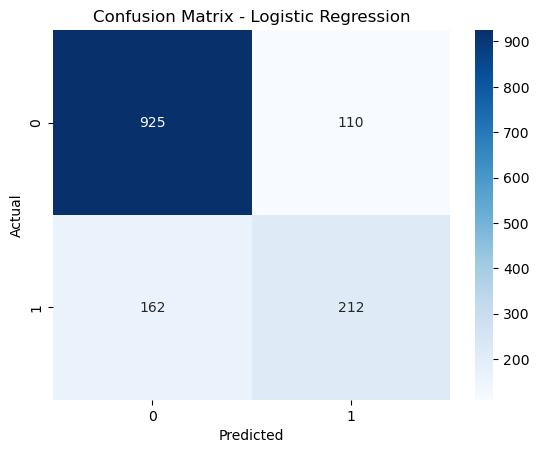

ROC AUC Score: 0.8415846443979436


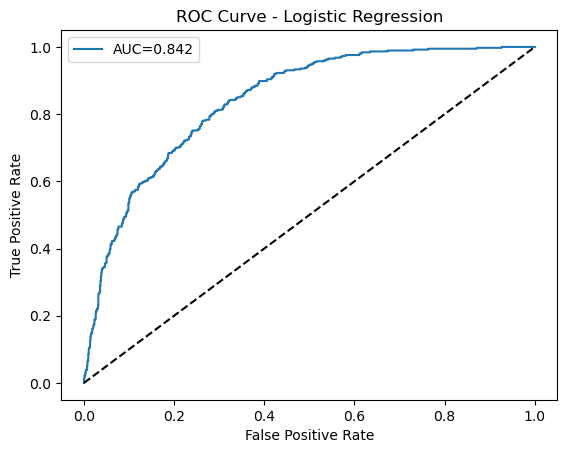

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC-AUC
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]
roc_auc = roc_auc_score(y_test, y_proba_lr)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
y_pred_rf = rf.predict(X_test_scaled)


In [20]:
from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7934705464868701

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



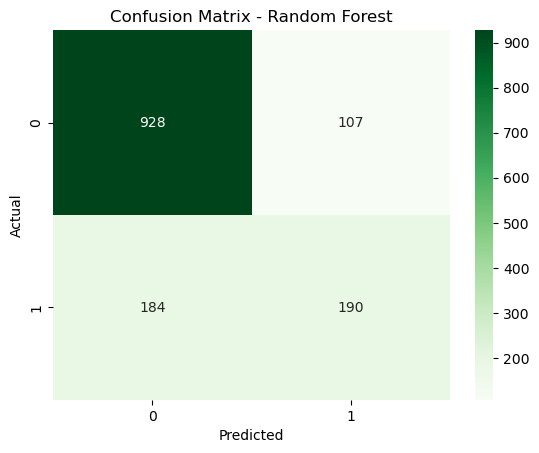

Random Forest ROC AUC Score: 0.8264964220207186


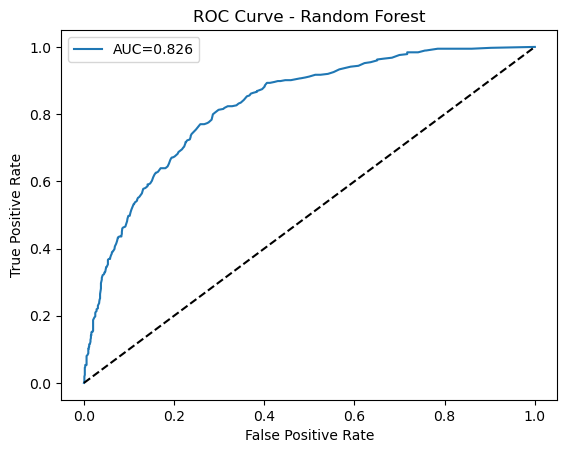

In [21]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC-AUC
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_rf:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


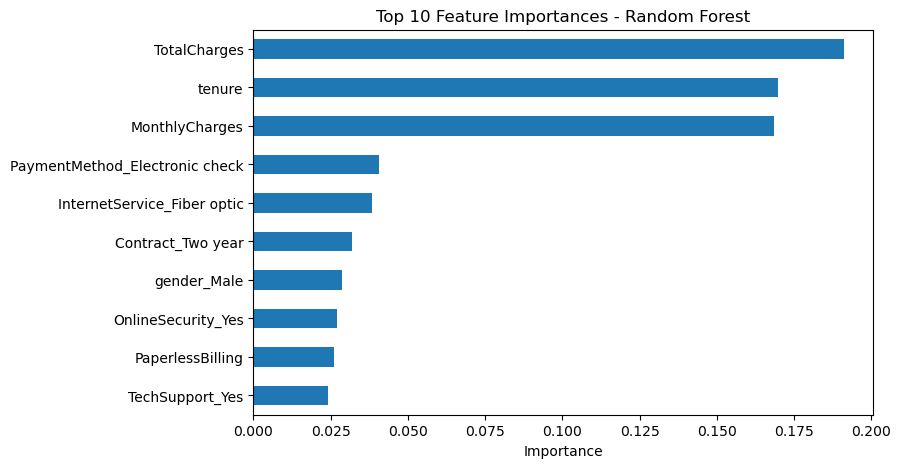

In [22]:
# Get feature importances
importances = rf.feature_importances_

# Get column names after scaling and encoding
feature_names = X_train.columns

# Create a Series for easier plotting
import pandas as pd
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 10 features
import matplotlib.pyplot as plt
feat_imp.head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()


In [27]:
import joblib

# Random Forest model save
joblib.dump(rf, "customer_churn_model.pkl")

# Scaler save (kyunki features scale kiye the)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [28]:
new_customer = pd.DataFrame([{
    'SeniorCitizen':0, 'Partner':1, 'Dependents':0, 'tenure':12,
    'PhoneService':1, 'PaperlessBilling':1, 'MonthlyCharges':70.35, 'TotalCharges':800.5,
    'gender_Male':0, 'MultipleLines_No phone service':0, 'MultipleLines_Yes':1,
    'InternetService_Fiber optic':0, 'InternetService_No':0,
    'OnlineSecurity_No internet service':1, 'OnlineSecurity_Yes':0,
    'OnlineBackup_No internet service':0, 'OnlineBackup_Yes':1,
    'DeviceProtection_No internet service':1, 'DeviceProtection_Yes':0,
    'TechSupport_No internet service':1, 'TechSupport_Yes':0,
    'StreamingTV_No internet service':1, 'StreamingTV_Yes':0,
    'StreamingMovies_No internet service':1, 'StreamingMovies_Yes':0,
    'Contract_One year':0, 'Contract_Two year':0,
    'PaymentMethod_Credit card (automatic)':0,
    'PaymentMethod_Electronic check':1, 'PaymentMethod_Mailed check':0
}])

# Fill missing columns
for col in X_train.columns:
    if col not in new_customer.columns:
        new_customer[col] = 0

# Reorder columns
new_customer = new_customer[X_train.columns]

# Scale numeric features
new_customer_scaled = scaler.transform(new_customer)

# Predict churn
prediction = rf.predict(new_customer_scaled)
probability = rf.predict_proba(new_customer_scaled)[:,1]

print("Prediction (0=No churn, 1=Churn):", prediction[0])
print("Probability of Churn:", probability[0])


Prediction (0=No churn, 1=Churn): 0
Probability of Churn: 0.145
